<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 9: Shrinkage Methods: Ridge & Lasso </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2>Lecture Outline</h2>

<ul>
    <li>What are shrinkage methods and why do we need them?</li>
    <li> Ridge Regression</li>
    <li>Lasso Regression</li>
    <li>Implementing Ridge & Lasso with Python</li>
 
    
</ul>

<h3> Whats & Whys</h3>

As the name suggests, shrinkage methods are a way of fitting a linear method using all of the predictors, but unlike least squares method, they <i> constrain/regularize</i> the estimated coefficiets; specifically, they <i> shrink</i> them towards zero.

The two most popular techniques for shrinking the estimated regression coefficients are <b> Ridge Regression</b> and the <b> Lasso</b> method.

We will discuss this in more detail shortly, but in a nutshell, it can be shown that shrinking the coefficients towards zero may significantly reduce the variance of the model. 

<h3> Ridge Regression</h3>

Ridge regression is very simmilar to least squares method, except that in this case the coefficients are estimated by minimizing $RSS+\ell^2-$regularization. That is, the ridge regression estimated coefficients $\hat{\beta}^R_{\lambda}$ are the ones that minimize the following objective function:

$$R(\beta_0,\dots,\beta_p,\lambda)=\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\right)^2+\lambda\sum_{j=1}^p\beta_j^2=RSS+\lambda||\beta||_2^2,$$

where $\lambda\geq 0$ is some tuning parameter.

In ridge regression, for each $\lambda$ we obtain a different set of estimated coefficients $\hat{\beta}^R_\lambda$. Observe, that when $\lambda=0$ we get back the least squares model. 

So, what doese exactly the extra regularization $\lambda||\beta||_2^2$ do? Note, that the goal is still to minimize $R(\beta_0,\dots,\beta_p,\lambda)$, and to do so there are two terms that need to be minimized, namely $RSS$ and the added regularization term $\lambda||\beta||_2^2,$ and in many ways they compete with one another. In particular, the regularization term is small when the coefficients $\beta_0,\dots,\beta_p$ tend to zero. The role of the tuning parameter $\lambda$ is precisely to control how much of an effect these two terms have in the model. Let's look at two extremes: If $\lambda=0$ then, obviously, the second term has no impact in estimating the coefficeints. On the other hand, if $\lambda\to \infty$(is very large), then in order for $R(\beta_0,\dots,\beta_p,\lambda)$ to be minimized all of the coefficients $\beta_0,\dots,\beta_p$ must shrink towards zero. 

<b>Question 1:</b> Why is the shrinkage penalty applied only to $\beta_1,\dots,\beta_p$ but not to the intercept $\beta_0$?

<h4>What does ridge regression accomplish that the least squares can't?</h4>

At the core of the answer lies the <i> bias-variance trade-off</i>. As $\lambda$ increases from $0$ to a large number, the flexibility of the model decreases. This results in a decrease in variance at the cost of an increase in bias. The hope is that, at least initially, the variance decreases much faster than the increase in bias, leading to an overall better performance(e.g. smaller test MSE) of the ridge regression over the simple least squares regression model. By shrinking, some or all of the coefficients, in effect we are regularizing the relative effect that a change in a feature has on the response. In other words, by increasing the tuning parameter $\lambda$, in some sense we are constraining the magnitude of the change in the response variable that could be produced by a small change in a feature. 

<h3>The Lasso Method</h3>

The idea behind the Lasso method is very similar to the ridge regression, except that now the lasso coefficient estimates $\hat{\beta}^L_\lambda$, minimize the following quantity:


$$L(\beta_0,\dots,\beta_p,\lambda)=\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\right)^2+\lambda\sum_{j=1}^p|\beta_j|=RSS+\lambda||\beta||_1.$$

In mathematical terms, $||\beta||_1=\sum_{j=1}^p|\beta_j|$ is called the $\ell^1-$norm.

The key difference between the ridge regression and the Lasso method, is that while the lasso method also shrinks the coefficient estimates towards zero, the $\ell^1-$penalty actually may force some of the coefficient estimates to be <b> exactly zero</b> when $\lambda$ is sufficiently large. Because of this reason, Lasso has an added advantage towards the ridge regression, as it may be used for <i>feature selection</i> as well. In other words, intuitively speaking, if a feature is not contributing in a significant way to predict the response variable, then the lasso method has a higher chance of noticing this behaviour and setting the coefficent corresponding to this feature equal to zero. In situations like these, lasso also tends to outperform the ridge regression. 

Intrinsically, the lasso method in some ways assumes that some of the features do not play a significant role in predicting the response. Because of this, in the cases where all of the features play a similar role in predicting the response then ridge regression may outperform lasso. 

Unfortunately, we never know apriori which predictors are strongly related to the response and which are not. As a result, we rely on cross-validation and similar techniques to determine which model is the most appropriate one for each particular data set.

<h3>Implementing Ridge and Lasso</h3>

We will use the `boston housting` dataset to illustrate the methods.

Let's start by importing all of our standard libraries.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
df['target']=boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 We will begin by splitting our data into a training set `X_t` and a validation set `X_v`. The validation set will be used only after we have tuned our models to test the prediction power of our model.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_t,X_v=train_test_split(df, test_size=0.25)

In [14]:
X_t.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
397,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92,8.5
278,0.07978,40.0,6.41,0.0,0.447,6.482,32.1,4.1403,4.0,254.0,17.6,396.90,7.19,29.1
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
222,0.62356,0.0,6.20,1.0,0.507,6.879,77.7,3.2721,8.0,307.0,17.4,390.39,9.93,27.5


Next, let's go ahead and import both Ridge Regression and Lasso models along with cross calidation 

In [15]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression

The data is not scaled so we need to rescale.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()


In [18]:
X=X_t.drop('target',axis=1)
y=X_t['target']

In [19]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
mean=scaler.mean_
std=scaler.scale_

In [21]:
scaled=scaler.transform(X)

In [22]:
X_sc=pd.DataFrame(scaled,columns=X.columns,index=X.index)

In [23]:
X_sc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,-0.388114,-0.507958,-0.599385,-0.271393,-0.928176,-0.161848,-2.203463,0.864399,-0.743283,-1.043172,-0.222388,0.300356,-0.951221
397,0.467611,-0.507958,1.040360,-0.271393,1.216512,-0.754129,1.080236,-1.029112,1.683209,1.546642,0.814273,0.407034,1.043851
278,-0.395127,1.193841,-0.672654,-0.271393,-0.936930,0.277450,-1.296266,0.132195,-0.627736,-0.917569,-0.357605,0.448697,-0.756097
120,-0.396353,-0.507958,2.146712,-0.271393,0.236083,-0.581497,0.041406,-0.739908,-0.858830,-1.312322,0.318479,0.363727,0.259113
222,-0.333335,-0.507958,-0.703426,3.684688,-0.411700,0.834644,0.326017,-0.269993,-0.165547,-0.600571,-0.447749,0.377322,-0.368677


In [24]:
lasso=Lasso(alpha=1.25)
ridge=Ridge(alpha=1.25)

In [25]:
kf=KFold(n_splits=5,shuffle=True, random_state=101)

In [26]:
cv_lasso=cross_validate(estimator=lasso,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2','neg_mean_squared_error'})
cv_ridge=cross_validate(estimator=ridge,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2','neg_mean_squared_error'})

In [29]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [30]:
-cv_lasso['test_neg_mean_squared_error']

array([25.8697042 , 31.34915688, 23.18919892, 44.61153244, 37.71695713])

In [31]:
-cv_ridge['test_neg_mean_squared_error']

array([23.35721723, 26.51049929, 16.69780086, 34.7833861 , 29.23859753])

In [34]:
cv_lasso['test_r2'].mean()

0.6368240554347988

In [35]:
cv_ridge['test_r2'].mean()

0.7074690174030739

In [40]:
#returns the fitted model from the first fold
cv_lasso['estimator'][0]

Lasso(alpha=1.25, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
#returns the fitted model coefecients from the first fold
cv_lasso['estimator'][0].coef_

array([-0.        ,  0.        , -0.        ,  0.32041252, -0.        ,
        2.17881201,  0.        , -0.        , -0.        , -0.        ,
       -1.26179201,  0.        , -4.05683153])

Let's get the coefficients for both models.

In [42]:
df_lasso=pd.DataFrame(cv_lasso['estimator'][3].coef_,index=X.columns,columns=['Lasso'])

In [43]:
df_ridge=pd.DataFrame(cv_ridge['estimator'][3].coef_,index=X.columns,columns=['Ridge'])

In [44]:
df_lasso

,Lasso
CRIM,-0.000000
ZN,0.000000
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,2.822962
AGE,-0.000000
DIS,-0.000000
RAD,-0.000000
TAX,-0.000000


In [45]:
df_ridge

,Ridge
CRIM,-0.800442
ZN,1.212263
INDUS,0.523053
CHAS,0.346944
NOX,-1.661305
RM,3.095930
AGE,0.334709
DIS,-2.669941
RAD,2.916420
TAX,-2.590674


Next, let's join these frames into one, for presentation purposes.

In [47]:
#pairs the two data frames together. on=df_lasso.index says 'use the index from the lasso data set for the new df
df_lasso.join(df_ridge,on=df_lasso.index)

,Lasso,Ridge
CRIM,-0.000000,-0.800442
ZN,0.000000,1.212263
INDUS,-0.000000,0.523053
CHAS,0.000000,0.346944
NOX,-0.000000,-1.661305
RM,2.822962,3.095930
AGE,-0.000000,0.334709
DIS,-0.000000,-2.669941
RAD,-0.000000,2.916420
TAX,-0.000000,-2.590674


As we can see, Lasso has set some of the coefficients exactly to zero. The inerpretation is that the model does not rely at all, for example, on `CRIM, ZN,INDUS, CHAS, NOX, AGE, DIS, RAD, TAX, B` to make predictions on the price of a house it has not previously seen. If we increase the value of $\lambda$ more of the predictors will be set to zero in the lasso method. 

<font size=4 color='red'>Exercise</font>

Tune the model. In other words, search for the best `alpha` that results in the lowest MSE and highest R2 score. Then plot both MSE and R2 as a function of `alpha`. Pick the best alpha for each model and test the power of your model using the validation set `X_v`.

In [907]:
X_sc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
163,-0.261403,-0.500283,1.276804,3.610684,0.448184,2.834402,0.915438,-0.783159,-0.524739,-0.005680,-1.704989,0.347039,-1.258582
300,-0.460851,2.382853,-1.290610,-0.276956,-1.315903,0.772790,-0.753286,1.923374,-0.524739,-0.274012,-1.659039,0.373819,-0.877941
118,-0.449165,-0.500283,-0.140160,-0.276956,-0.050923,-0.596592,0.168998,-0.632446,-0.409782,0.167246,-0.280548,-0.206566,0.409317
113,-0.436786,-0.500283,-0.140160,-0.276956,-0.050923,-0.295026,0.969267,-0.598768,-0.409782,0.167246,-0.280548,0.440936,0.647391
484,-0.145163,-0.500283,1.057670,-0.276956,0.258867,-0.597963,-0.950661,-0.036997,1.659449,1.562573,0.822245,0.150133,0.128335


In [50]:
#Start Your Answer Here
param_alpha=np.arange(0.0001,10,0.1)
kf=KFold(n_splits=5,shuffle=True, random_state=101)

In [57]:
mse_lasso,r2_lasso,mse_ridge,r2_ridge=[],[],[],[]

for param in param_alpha:
    lasso=Lasso(alpha=param)
    ridge=Ridge(alpha=param)
    
    
    cv_lasso=cross_validate(estimator=lasso,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2','neg_mean_squared_error'})
    cv_ridge=cross_validate(estimator=ridge,X=X_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2','neg_mean_squared_error'})
    mse_lasso.append(-cv_lasso['test_neg_mean_squared_error'].mean())
    mse_ridge.append(-cv_ridge['test_neg_mean_squared_error'].mean())
    
    r2_lasso.append(cv_lasso['test_r2'].mean())
    r2_ridge.append(cv_ridge['test_r2'].mean())
    

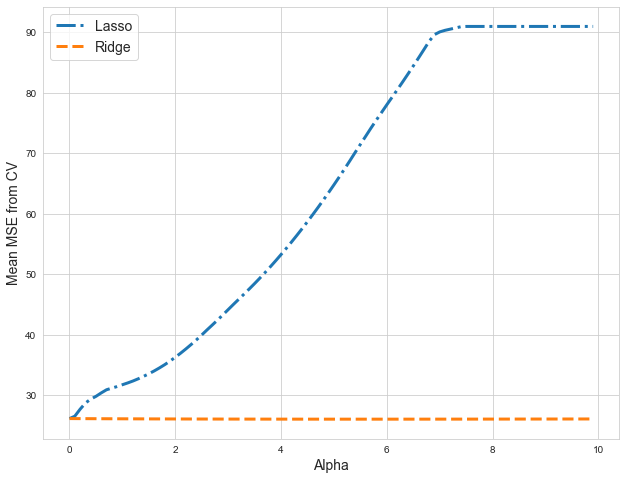

In [60]:
sns.set_style('whitegrid')

param_alpha=np.arange(0.001,10,0.1)

fig=plt.figure(figsize=(8,6))

axes=fig.add_axes([0,0,1,1])

axes.plot(param_alpha,mse_lasso, linestyle='-.',lw=3,label='Lasso')
axes.plot(param_alpha,mse_ridge,ls='--',lw=3,label='Ridge')

axes.set_xlabel("Alpha",fontsize=14)
axes.set_ylabel("Mean MSE from CV",fontsize=14)

plt.legend(fontsize=14)

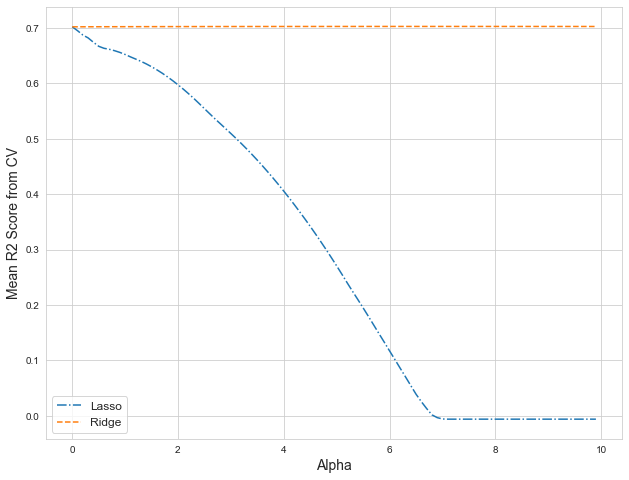

In [909]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(8,6))

axes=fig.add_axes([0,0,1,1])

axes.plot(param_alpha,r2_lasso, linestyle='-.',lw=1.5,label='Lasso')
axes.plot(param_alpha,r2_ridge,ls='--',lw=1.5,label='Ridge')

axes.set_xlabel("Alpha",fontsize=14)
axes.set_ylabel("Mean R2 Score from CV",fontsize=14)

plt.legend(fontsize=12)
plt.show()

<font size=5 color='red'>Exercise ctd</font>

Pick the best $\alpha$, the best model and compute the test R2 using the validation set `X_v`.

In [61]:
#Start Your Answer Here
X_v.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08,24.6
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72,24.2
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39,18.0


In [66]:
X_t=X_v.drop('target',axis=1)
y_t=X_v['target']

In [76]:
model=Ridge(alpha=6)

In [77]:
model.fit(X_sc,y)

Ridge(alpha=6, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [78]:
X_test=(X_t-mean)/std

In [79]:
pred=model.predict(X_test)

In [80]:
from sklearn.metrics import r2_score

In [81]:
#Best R2 Score
r2_score(y_t,pred)

0.7205836233886624